# Introduction to Python
# Homework #5
# Due Thursday Noon 3/2 in Courseworks
- You MUST submit on Courseworks before it closes
- Email submissions are NOT accepted

# Academic Honesty
* The computer science department has strict polices. Check
the department [web page](http://www.cs.columbia.edu/education/honesty) for details. 
- Do not look at anybody else's source code. Do not show anybody
your source, or leave your source where somebody could see it.
You MUST write your own code.
- For this class, feel free to discuss issues with other people, but suggest waiting an hour or two after a discussion, before writing your code.
-  Cases of non original source will be refered to the Judical Committee.



# Problem 1 - Plot Bessel Functions
- plot 'j0' bessel function 
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.j0.html#scipy.special.j0)
- use 'jn_zeros' to find the zeros(where function plot crosses x axis) of 'j0' 
    - [doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jn_zeros.html#scipy.special.jn_zeros)
    - first arg must be 0
- start the plot at x = 0 on the left
- go as far right as needed to display the requested number of zeros
- for a smooth plot, evaluate j0 at .1 increments(x = .0, .1, .2,...)
    - can use np.arange to generate the x values
    - [doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html)
- return the list of j0 zeros
- 04a-examples has simple function plotting examples


In [49]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

# make plots render in the notebook
%matplotlib inline

[scipy.special.j0(1), scipy.special.j0(2)]

[0.76519768655796649, 0.22389077914123562]

In [50]:
# note j0() takes lists...

scipy.special.j0([0,1])

array([ 1.        ,  0.76519769])

In [51]:
# ...and arrays as args 
# returns an array of the evaluations

scipy.special.j0(np.array([0,1]))

array([ 1.        ,  0.76519769])

In [52]:
# first arg to jn_zeros must be 0

# first three zeros of j0

scipy.special.jn_zeros(0, 3)


array([ 2.40482556,  5.52007811,  8.65372791])

In [58]:
# check the zeros

scipy.special.j0(scipy.special.jn_zeros(0, 3))

array([ -9.58688255e-17,  -1.64951298e-17,  -8.75148280e-17])

array([ 2.40482556,  5.52007811])

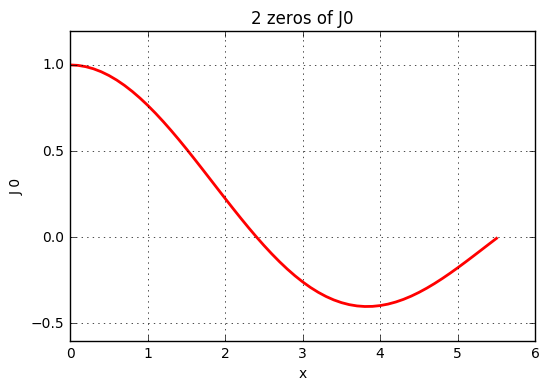

In [74]:
bessel(2)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,  14.93091771])

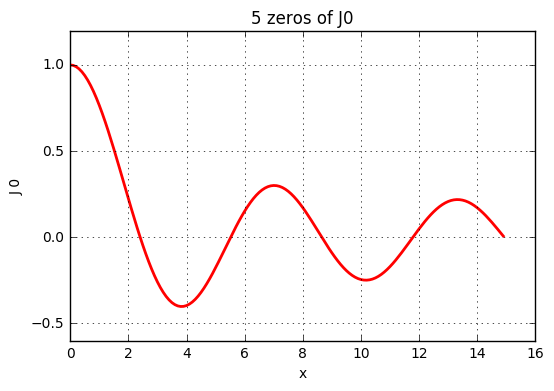

In [61]:
bessel(5)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,
        14.93091771,  18.07106397,  21.21163663,  24.35247153,
        27.49347913,  30.63460647])

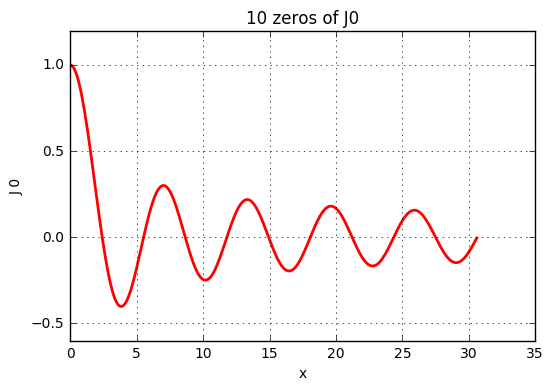

In [62]:
bessel(10)

array([  2.40482556,   5.52007811,   8.65372791,  11.79153444,
        14.93091771,  18.07106397,  21.21163663,  24.35247153,
        27.49347913,  30.63460647,  33.77582021,  36.91709835,
        40.05842576,  43.19979171,  46.34118837,  49.4826099 ,
        52.62405184,  55.76551076,  58.90698393,  62.04846919,
        65.1899648 ,  68.33146933,  71.4729816 ,  74.61450064,
        77.75602563,  80.89755587,  84.03909078,  87.18062984,
        90.32217264,  93.46371878])

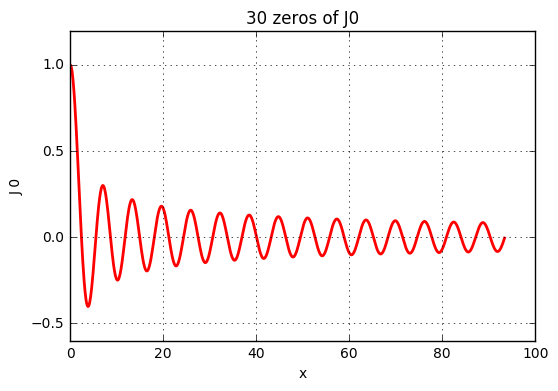

In [63]:
bessel(30)

# Problems 2 & 3
- in class, we discussed two different ways to represent a polynomial
    - polylist, a 'dense' represenation, that hold the coefficients in a list
    - polydict, a 'sparse' representation, that holds (exponent, coefficent) pairs in a dict
- add a method, 'topolydict()' to class 'polylist', that converts the polylist into a polydict
- add a method, 'topolylist()' to class 'polydict', that converts the polydict into a polylist
- add a method, ```__mul__``` to class 'polydict', which implements the '*' operator
    - see examples below
- note that polylist->polydict will always work, but polydict->polylist can fail, because a polylist cannot represent negative exponents. in this case, raise a ValueError
- just to tell them apart, polylist prints with a leading '+'

In [ ]:
import functools

class polylist: 
    ''' 
    list poly representation
    coe[n] is the coefficient of the X**n term
        
    [1,2,3] <=> + 3*X**2 + 2*X + 1
    '''
    def __init__(self, coe):
        self.coe = coe

    def termString(self, c , e):
        cs = str(c)
        if c > 0:
            cs = '+ ' + cs
        if (e == 0):
            return(cs)
        if (e == 1):
            return('%s*X' % cs)    
        return('%s*X**%d' % (cs,e))
        
    def __str__(self):
        # print math style
        if self.coe == []:
            return('0')
        terms = [self.termString(c,e) 
            for e,c in enumerate(self.coe) 
            if c != 0]
        terms.reverse()
        s = (' '.join(terms))
        # get rid of leading + 
        return(s)
        
    def __repr__(self):
        return(self.__str__())

    def __len__(self):
        # number of non zero terms
        # 0 len => bool false
        return(len(self.coe) - self.coe.count(0))

    def __add__(self, p2):
        p1len = len(self.coe)
        p2len = len(p2.coe)
        pad = p2len - p1len
        c1 = self.coe
        c2 = p2.coe
        
        if pad < 0:
            c1, c2 = c2, c1
            pad = -pad
    
        c1 = c1[:]
        
        c1.extend([0]*pad)
    
        return(polylist([t1+t2 for t1,t2 in zip(c1,c2)]))
    
    # don't allow a hash
    __hash__ = None    
    
    def evaluate(self, n):
        sum = 0
        for e,c in enumerate(self.coe):
            sum += c*n**e
        return(sum)

    def differentiate(self):
        return(polylist([e*c for e,c in enumerate(self.coe)][1:]))
    
    def integrate(self):
        pi = [c/(e+1.) for e,c in enumerate(self.coe)]
        pi.insert(0,0)
        return(polylist(pi))
    
    def __mul__(self, p2):
        sums = []
        for e1,c1 in enumerate(self.coe):
            prod = [c1 * c2 for c2 in p2.coe]
            for rpt in range(e1):
                prod.insert(0, 0)
            sums.append(polylist(prod))
        return(functools.reduce(polylist.__add__, sums))
   

In [ ]:
class polydict:
    '''sparse poly representation using a dict
        sparse is {exponent:coefficient, ...}
        only non-zero terms appear in the dict
        
        {2:3, 1:2, 0:1} <=> 3*X**2 + 2*X + 1
    '''
    def __init__(self, d={}):

        # why the copy??
        self.sparse = d.copy()

    def printTerm(self, c ,e):
        cs = str(c)
        if c > 0:
            cs = '+ ' + cs
        if (e == 0):
            return(cs)
        if (e == 1):
            return('%s*X' % cs)    
        return('%s*X**%d' % (cs,e))   
        
    def __str__(self):
        if len(self.sparse) == 0:
            return('0')
        terms = [self.printTerm(self.sparse[e],e) 
                for e in sorted(self.sparse.keys(), 
                                reverse=True) 
                    if self.sparse[e] != 0]
        s = ' '.join(terms)
        if '+ ' == s[0:2]:
            s = s[2:]
        return (s)
    
    def __repr__(self):
        return(self.__str__())

    # don't allow a hash
    __hash__ = None  
    
    def __len__(self):
        return(len(self.sparse))

    # can explicity define bool
    def __bool__(self):
        return(False if len(self.sparse)==0 else True)
        
    def __iter__(self):
        # return a generator function that will
        # iterate thru (exp, coe) pairs
        return( (i for i in self.sparse.items() ))

    # should check types
    def __eq__(self, other):
        return(self.sparse == other.sparse)
        
    def __ne__(self, other):
        return(self.sparse != other.sparse)
        
    # define comparsion to be value of poly at 1
    def __lt__(self, other):
        return(self.evaluate(1) < other.evaluate(1))
        
    def __le__(self, other):
        return(self.evaluate(1) <= other.evaluate(1))
        
    # does poly 'contain' an exponent?
    def __contains__(self, e):
        return(e in self.sparse)
                
    def evaluate(self, n):
        '''eval poly at x=n'''
        sum = 0
        for e in self.sparse.keys():
            sum += self.sparse[e]*n**e
        return(sum)
            
    def __add__(self, p2):
        '''add two polys'''
        n = self.sparse.copy()
        for k,v in p2.sparse.items():
            if None == n.get(k):
                n[k] = v
            else:
                n[k] += v
        return(polydict(n))
        
    def __getitem__(self, index):
        '''pull out terms of the poly
           p[2], p[2:5]
           '''
        keys = sorted(self.sparse.keys(), reverse=True)
        if isinstance(index, int):
            # if asked for a single term, p[n], index will
            # be an int
            inds = [index]
        if isinstance(index, slice):
            # if asked for a slice, p[n:m], index will be
            # a 'slice' object
            inds = range(*index.indices(len(keys)))
        d = {}
        for i in inds:
            e = keys[i]
            d[e] = self.sparse[e]
        return(polydict(d))
        
    def __rmul__(self, p2):
        ''' multiple by a scalar on the right
            5*p1
            '''
        if isinstance(p2, int):
            nd = {}
            for e,c in self.sparse.items():
                nd[e] = c * p2 
            return(polydict(nd))
        
    def differentiate(self):
        d = {}
        for e,c in self.sparse.items():
            if e != 0:
                d[e-1] = c * e
        return(polydict(d))
    
    def integrate(self):
        d = {}
        for e,c in self.sparse.items():
            d[e+1] = c /(e+1.)
        return(polydict(d))



In [ ]:
# test polys

pl1 = polylist([1, 2, 3])
pl2 = polylist([0, 10, 5])
pd1 = polydict({2:3, 1:2, 0:1})
pd2 = polydict({1:10, 2:5})
pd3 = polydict({-1:10, 2:5})

[pl1, pl2, pd1, pd2, pd3]

In [ ]:
[pl1.topolydict(), pl2.topolydict(), pd1.topolylist(), pd2.topolylist()]

In [ ]:
# can't convert negative exponents in a polydict to polylist

pd3.topolylist()

In [ ]:
# multiply method examples

[pd1, pd2, pd3, pd1 * pd2, pd1 * pd3, pd2 * pd3]

# Problem 4 & 5 
- Extract data directly from a zipfile without unpacking it
- use zipfile module [doc](https://docs.python.org/3.5/library/zipfile.html#zipfile.ZipInfo). 
- in part, this problem is an exercise in reading Python documentation
- only need to use three methods:
    - zipfile.ZipFile(path)
        - 'open' the zip file and read from it
        - like 'open', should use 'with' to manage it
    - zipfile.namelist()
        - returns list of the files in zip archive
    - zipfile.open()
        - opens a file in the zip for reading
        - use 'with'


# write 'phelp' class
- extract info from python's help documentation
- download 'python-docs.zip' from CourseWorks
- write four methods:
    - ```__init__()``` method should read in all the help files and save
them in the help object. remember to convert to unicode, and remove the newline chars.
    - fileHits() method - print hits/file
    - totalHits() method - checks all file lines for match, and print hit count
    - grep() method - print file name, line number, and line of each match

- note that like the linux 'grep' command, multiple appearances of the search string in a single line is considered ONE hit - we are counting the lines that have a hit(s). 
- decode using 'utf-8'

In [2]:
phelp('asdf')

FileNotFoundError: file asdf does not exist

In [44]:
# set to where ever you place the python docs zip file

zfile = 'python-docs.zip'

p = phelp(zfile)

reading 479 files


In [45]:
p.fileHits('zipfiles')

1 python-3.6.0-docs-text/whatsnew/3.2.txt
1 python-3.6.0-docs-text/reference/import.txt
3 python-3.6.0-docs-text/using/cmdline.txt
1 python-3.6.0-docs-text/distutils/apiref.txt
1 python-3.6.0-docs-text/library/warnings.txt


In [46]:
[p.totalHits(w) for w in ['rpartition', 'linux','universal', 'mode', 'zipfile', 'zipfiles']]

11
42
59
1172
99
7


[None, None, None, None, None, None]

In [47]:
p.grep('rpartition')

python-3.6.0-docs-text/whatsnew/2.5.txt:976: "rpartition(sep)" methods that simplify a common use case.
python-3.6.0-docs-text/whatsnew/2.5.txt:985: "rpartition(sep)" also returns a 3-tuple but starts searching from
python-3.6.0-docs-text/whatsnew/2.5.txt:996: >>> 'www.python.org'.rpartition('.')
python-3.6.0-docs-text/whatsnew/2.5.txt:998: >>> 'www.python.org'.rpartition(':')
python-3.6.0-docs-text/whatsnew/3.2.txt:2383: extension = name.rpartition('.')[2]
python-3.6.0-docs-text/whatsnew/3.2.txt:2424: also used by "rfind()", "rindex()", "rsplit()" and "rpartition()".
python-3.6.0-docs-text/whatsnew/2.7.txt:917: * The "split()", "replace()", "rindex()", "rpartition()", and
python-3.6.0-docs-text/library/importlib.txt:1434: parent_name, _, child_name = absolute_name.rpartition('.')
python-3.6.0-docs-text/library/stdtypes.txt:1527: str.rpartition(sep)
python-3.6.0-docs-text/library/stdtypes.txt:2281: bytes.rpartition(sep)
python-3.6.0-docs-text/library/stdtypes.txt:2282: bytearray.rparti

In [48]:
p.grep('zipfiles')

python-3.6.0-docs-text/library/warnings.txt:328: used to support displaying source for modules found in zipfiles or
python-3.6.0-docs-text/whatsnew/3.2.txt:1545: zipfiles, uncompressed tarfiles, gzipped tarfiles, and bzipped
python-3.6.0-docs-text/distutils/apiref.txt:794: as tarballs or zipfiles.
python-3.6.0-docs-text/using/cmdline.txt:83: and zipfiles that are passed to the interpreter as the script
python-3.6.0-docs-text/using/cmdline.txt:442: may refer to zipfiles containing pure Python modules (in either
python-3.6.0-docs-text/using/cmdline.txt:444: zipfiles.
python-3.6.0-docs-text/reference/import.txt:662: libraries) from zipfiles.


# put your phelp class in a command line script
- call your script 'phelp'
- use argparse module to process command line args
- if the path for the zip file is invalid, return an exit value of 1
    - this means you have to handle an error that the phelp constructor may raise
- not the most efficient command, as it re-reads the zip file each time it runs

In [ ]:
```
# to save you a little grief, here's how you want to define
# your command line args to argparse


# required positional arg
parser.add_argument("search", type=str,
                    help="search string")


# optional arg
parser.add_argument("-t", "--totalhits", help="show total number of hits in all files",
			 action='store_true')

# optional arg
parser.add_argument("-g", "--grep", help="show matching hit lines",
			 action='store_true')

# optional arg
parser.add_argument("-f", "--filehits", help="show number of hits in files",
			 action='store_true')

# optional arg with required zippath value
parser.add_argument("-z", "--zippath", help="path of python zip file",
			 action='store')


```


In [ ]:
```
# sample session


week5@larrys-MBP$ phelp
usage: phelp [-h] [-t] [-g] [-f] [-z ZIPPATH] search
phelp: error: the following arguments are required: search
            
week5@larrys-MBP$ phelp -h
usage: phelp [-h] [-t] [-g] [-f] [-z ZIPPATH] search

positional arguments:
  search                search string

optional arguments:
  -h, --help            show this help message and exit
  -t, --totalhits       show total number of hits in all files
  -g, --grep            show matching hit lines
  -f, --filehits        show number of hits in files
  -z ZIPPATH, --zippath ZIPPATH
                        path of python zip file
    
week5@larrys-MBP$ phelp -f zipfiles
1 python-3.6.0-docs-text/library/warnings.txt
3 python-3.6.0-docs-text/using/cmdline.txt
1 python-3.6.0-docs-text/distutils/apiref.txt
1 python-3.6.0-docs-text/whatsnew/3.2.txt
1 python-3.6.0-docs-text/reference/import.txt

week5@larrys-MBP$ phelp -t zipfiles
7

week5@larrys-MBP$ phelp -g zipfiles
python-3.6.0-docs-text/whatsnew/3.2.txt:1545: zipfiles, uncompressed tarfiles, gzipped tarfiles, and bzipped
python-3.6.0-docs-text/distutils/apiref.txt:794: as tarballs or zipfiles.
python-3.6.0-docs-text/library/warnings.txt:328: used to support displaying source for modules found in zipfiles or
python-3.6.0-docs-text/reference/import.txt:662: libraries) from zipfiles.
python-3.6.0-docs-text/using/cmdline.txt:83: and zipfiles that are passed to the interpreter as the script
python-3.6.0-docs-text/using/cmdline.txt:442: may refer to zipfiles containing pure Python modules (in either
python-3.6.0-docs-text/using/cmdline.txt:444: zipfiles.
                                                                                        

week5@larrys-MBP$ phelp -t zipfiles -z badzippath
file badzippath does not exist
week5@larrys-MBP$ echo $?
1
                                                                                                    
week5@larrys-MBP$ phelp -t zipfiles -z python-docs.zip 
7
week5@larrys-MBP$ echo $?
0
                                                                                                    
                                                                                                    
```